In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pip install geopandas

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 11.8MB 202kB/s 
     |████████████████████████████████| 10.1MB 26.1MB/s 


**Import Library and Load Dataset**

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm

import numpy as np
import seaborn as sns

import plotly.express as px

#import geopandas as gpd # install geopandas
#import plotly.graph_objects as go

In [0]:
data_mentalhealth = pd.read_csv("/content/drive/My Drive/Colab Notebooks/mental.csv")
data_mentalhealth

# import location dataset
#data_worldmap = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv")

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [0]:
# sns.catplot(x='self_employed', hue='remote_work', col='tech_company', kind='count', data=data_mentalhealth)

**Pra-Processing Data**

    Cleaning NaN

In [0]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

intColumn = ['Age']
stringColumn = ['gender', 'country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatColumn = []

# Clean the NaN's
for feature in data_mentalhealth:
    if feature in intColumn:
        data_mentalhealth[feature] = data_mentalhealth[feature].fillna(defaultInt)
    elif feature in stringColumn:
        data_mentalhealth[feature] = data_mentalhealth[feature].fillna(defaultString)
    elif feature in floatColumn:
        data_mentalhealth[feature] = data_mentalhealth[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
        
data_mentalhealth.head(5)

Error: Feature timestamp not recognized.
Error: Feature age not recognized.
Error: Feature gender not recognized.
Error: Feature country not recognized.
Error: Feature state not recognized.
Error: Feature comments not recognized.


,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


    Cleaning gender NaN

In [0]:
#Made gender groups
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
transgender = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in data_mentalhealth.iterrows():

    if str.lower(col.gender) in male:
        data_mentalhealth['gender'].replace(to_replace=col.gender, value='male', inplace=True)

    if str.lower(col.gender) in female:
        data_mentalhealth['gender'].replace(to_replace=col.gender, value='female', inplace=True)

    if str.lower(col.gender) in transgender:
        data_mentalhealth['gender'].replace(to_replace=col.gender, value='transgender', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
data_mentalhealth = data_mentalhealth[~data_mentalhealth['gender'].isin(stk_list)]

    Complete NaN age with mean

In [0]:
data_mentalhealth['age'].fillna(data_mentalhealth['age'].median(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    There are only 0.014% of self employed so let's change NaN to NOT self_employed
    Replace "NaN" string from defaultString

In [0]:
data_mentalhealth['self_employed'] = data_mentalhealth['self_employed'].replace([defaultString], 'No')
#print(data_mentalhealth['self_employed'].unique())

    There are only 0.20% of self work_interfere so let's change NaN to "Don't know
    Replace "NaN" string from defaultString

In [0]:
data_mentalhealth['work_interfere'] = data_mentalhealth['work_interfere'].replace([defaultString], 'Don\'t know' )
#print(data_mentalhealth['work_interfere'].unique())

**1. Apakah penyakit kesehatan mental lebih sering terjadi pada pekerja IT dibandingkan dengan yang non-IT?**

In [0]:
# mengelompokkan responden berdasarkan background
respondent_data_bg = data_mentalhealth.groupby('tech_company').count()
respondent_data_bg = respondent_data_bg.rename(index={'No': 'Perusahan Non IT', 'Yes': 'Perusahaan IT'})
respondent_data_bg

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
tech_company,,,,,,,,,,,,,,,,,,,,,,,,,,
Perusahan Non IT,228,228,228,228,139,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,30
Perusahaan IT,1029,1029,1029,1029,603,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,132


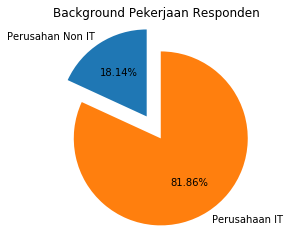

In [0]:
# visualtization
plt.pie(
      respondent_data_bg['treatment'],  # data
      labels=respondent_data_bg.index, # give label
      startangle=90, 
      autopct='%.2f%%', # set format value of label
      explode=(0.2, 0.1) # supaya mencar satu
)
plt.title('Background Pekerjaan Responden')
plt.show()

In [0]:
# mengelompokkan data berdasar butuh treatment ato nggak
respondent_data_needtreatment = data_mentalhealth.groupby('treatment').count()
respondent_data_needtreatment = respondent_data_needtreatment.rename(index={'No': 'Tidak butuh \'Treatment\'', 'Yes': 'Butuh \'Treatment\''})
respondent_data_needtreatment

,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
treatment,,,,,,,,,,,,,,,,,,,,,,,,,,
Tidak butuh 'Treatment',622,622,622,622,337,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,58
Butuh 'Treatment',635,635,635,635,405,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,635,104


In [0]:
worker_data = data_mentalhealth.groupby('treatment').apply(
                              lambda x: pd.Series(
                                  dict(
                                    non_techcompany_worker=(x.tech_company == 'Yes').sum(),
                                    techcompany_worker=(x.tech_company == 'No').sum()
                                )
                              )
                          )
worker_data = worker_data.rename(index={'No': 'Tidak butuh', 'Yes': 'Butuh'})
worker_data

,non_techcompany_worker,techcompany_worker
treatment,,
Tidak butuh,517,105
Butuh,512,123


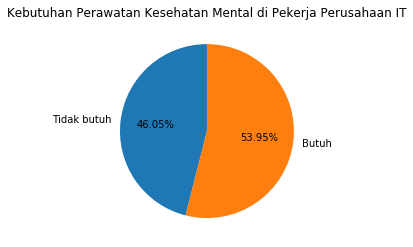

In [0]:
plt.pie(
      worker_data['techcompany_worker'],  # data
      labels=worker_data.index, # give label
      startangle=90, 
      autopct='%.2f%%', # set format value of label
)
plt.title('Kebutuhan Perawatan Kesehatan Mental di Pekerja Perusahaan IT')
plt.show()

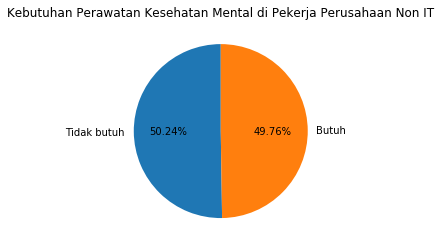

In [0]:
plt.pie(
      worker_data['non_techcompany_worker'],  # data
      labels=worker_data.index, # give label
      startangle=90, 
      autopct='%.2f%%', # set format value of label
)
plt.title('Kebutuhan Perawatan Kesehatan Mental di Pekerja Perusahaan Non IT')
plt.show()

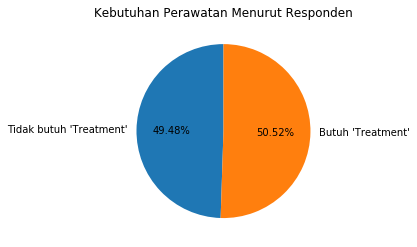

In [0]:
plt.pie(
      respondent_data_needtreatment['tech_company'],  # data
      labels=respondent_data_needtreatment.index, # give label
      startangle=90, 
      autopct='%.2f%%', # set format value of label
)
plt.title('Kebutuhan Perawatan Menurut Responden')
plt.show()

In [0]:
treatment_need_data = data_mentalhealth.groupby('tech_company').apply(
                              lambda x: pd.Series(
                                  dict(
                                    need_treatment=(x.treatment == 'Yes').sum(),
                                    dont_need_treatment=(x.treatment == 'No').sum()
                                )
                              )
                          )
treatment_need_data = treatment_need_data.rename(index={'No': 'Pekerja di Perusahaan Non IT', 'Yes': 'Pekerja di Perusahaan IT'})
treatment_need_data

,need_treatment,dont_need_treatment
tech_company,,
Pekerja di Perusahaan Non IT,123,105
Pekerja di Perusahaan IT,512,517


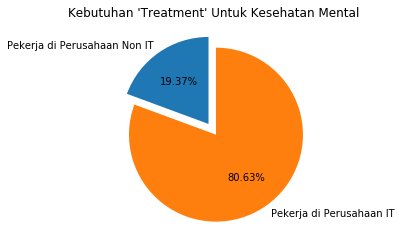

In [0]:
plt.pie(
      treatment_need_data['need_treatment'],  # data
      labels=treatment_need_data.index, # give label
      startangle=90, 
      autopct='%.2f%%', # set format value of label,
      explode=(0.1, 0.05) # supaya mencar satu
)
plt.title('Kebutuhan \'Treatment\' Untuk Kesehatan Mental')
plt.show()

**2. Bagaimana ukuran perusahaan berkaitan dengan memberikan fasilitas pekerja untuk membahas kesehatan mental?**

Text(0.5, 1.0, 'Jumlah Karyawan vs Layanan Perawatan')

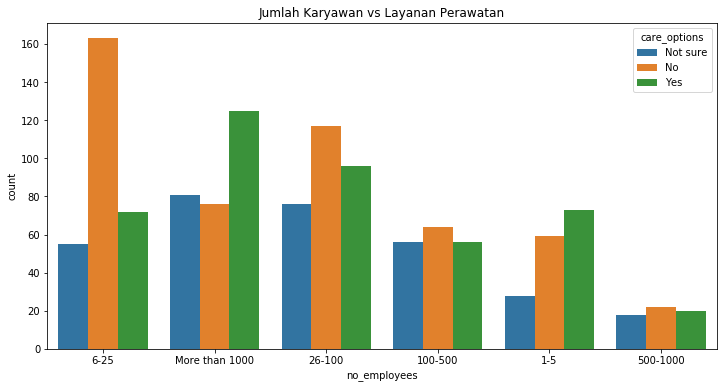

In [0]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(data = data_mentalhealth, x = 'no_employees', hue ='care_options' )
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('Jumlah Karyawan vs Layanan Perawatan')

**3. Bagaimana persebaran usia responden terhadap kebutuhan perawatan kesehatan mental?**

In [0]:
data_mentalhealth['age'] = pd.to_numeric(data_mentalhealth['age'],errors='coerce')
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
data_mentalhealth['age'] = data_mentalhealth['age'].apply(age_process)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Frekuensi')

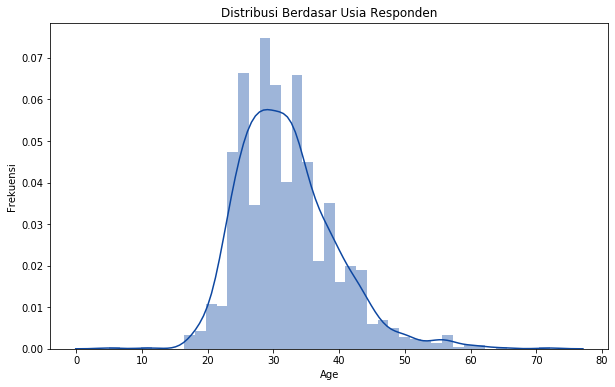

In [0]:
fig = plt.subplots(figsize=(10,6))
sns.distplot(
    data_mentalhealth['age'].dropna(),
    #ax=ax,
    kde=True,
    color='#0d47a1'
    )
plt.title('Distribusi Berdasar Usia Responden')
plt.ylabel('Frekuensi')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


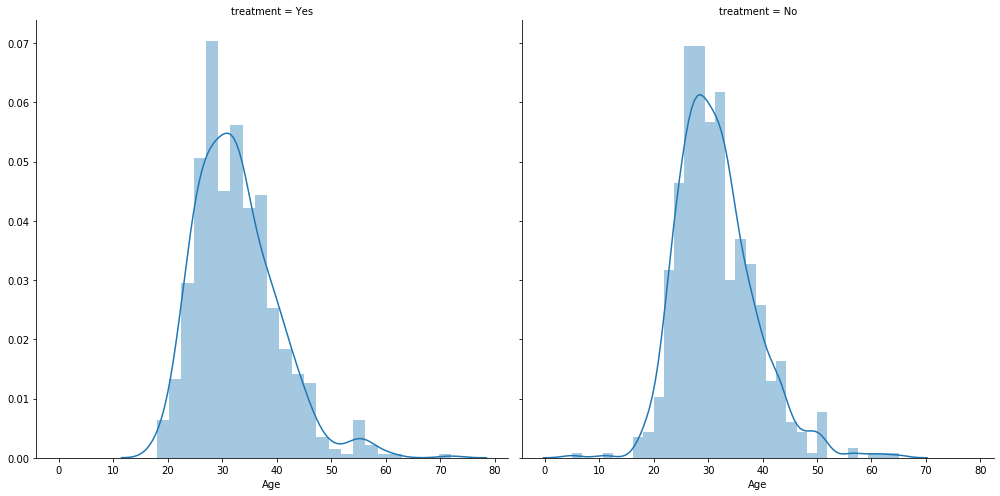

In [0]:
g = sns.FacetGrid(data_mentalhealth, col='treatment', size=7,margin_titles=True)
g = g.map(sns.distplot, "Age")

**4. Bagaimana Dampak Historis Keluarga Terhadap Kebutuhan Perawatan?**

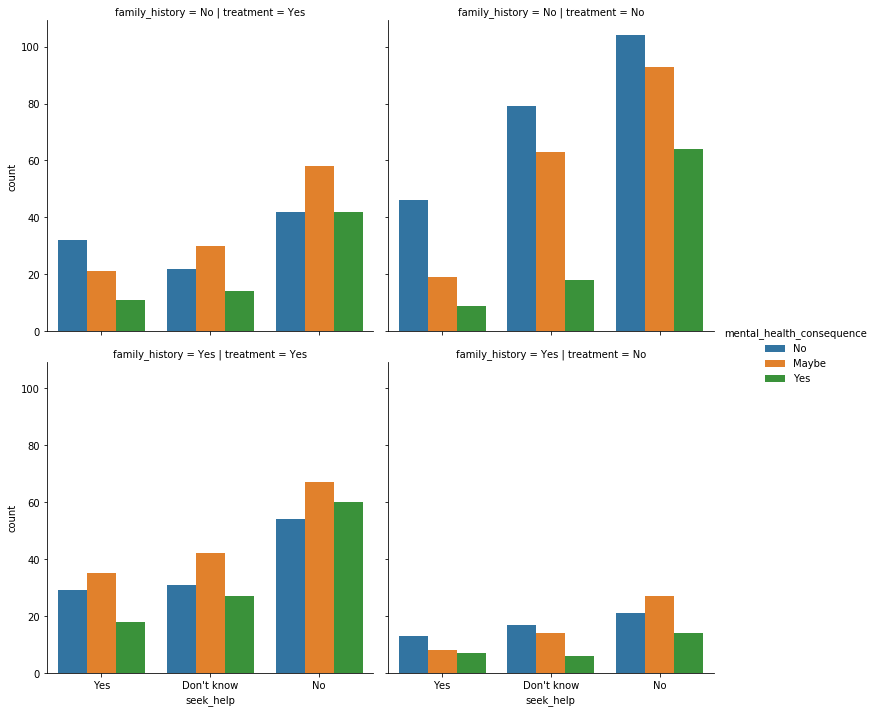

In [0]:
sns.catplot(x='seek_help', hue='mental_health_consequence', col='treatment', row='family_history', kind='count', data=data_mentalhealth)

**5. Bagaimana frekuensi penyakit kesehatan mental dan sikap terhadap kesehatan mental menurut lokasi geografis?**	

In [0]:
# make color for barplot
color = cm.inferno_r(np.linspace(.4,.8, 30))

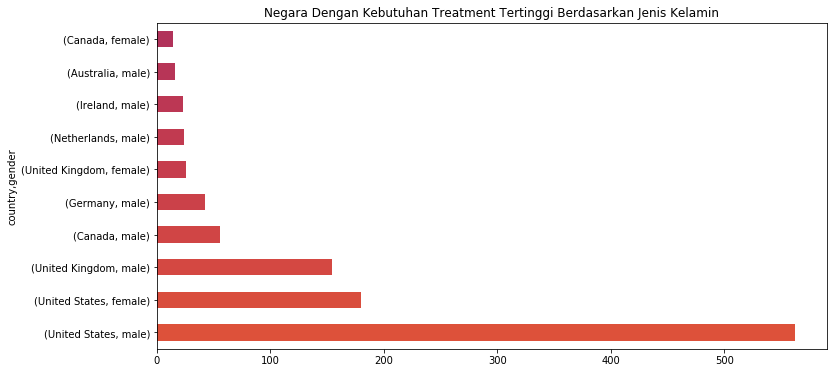

In [0]:
data_mentalhealth.groupby(['country','gender']).treatment.count().nlargest(10).plot(
                                                                                    kind = "barh",
                                                                                    figsize=(12,6), 
                                                                                    color= color,
                                                                                    title = "Negara Dengan Kebutuhan Treatment Tertinggi Berdasarkan Jenis Kelamin",
                                                                                    )

**5. Persebaran responden yang membutuhkan perawatan mental berdasarkan gender?**

In [0]:
from urllib.request import urlopen
import json
with urlopen("https://github.com/LudiaRD/visif/blob/master/latlang.json") as response:
    name=json.load(response)

import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/need.csv", dtype={"state": str})

import plotly.graph_objects as go
fig = go.Figure(go.Choroplethmapbox(geojson=name, locations=df.state, z=df.need,
                                    colorscale="Viridis", zmin=0, zmax=400,
                                    marker_opacity=0.5, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

JSONDecodeError: ignored